Examine feasible HODs for Molino galaxy catalogs at $z=0.5$ and $1$.

In [1]:
import os 
import scipy as sp 
import numpy as np 
# --- eMaNu --- 
from emanu import util as UT
from emanu import forwardmodel as FM
from emanu.sims import data as simData

In [2]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.ticker import StrMethodFormatter, NullFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline 

# read $z=0.5$ and $1$ Quijote halo catalogs

In [3]:
# QUIJOTE cosmology lookup table
hdr = np.genfromtxt(os.path.join(UT.dat_dir(), 'quijote_header_lookup.dat'), 
        delimiter='\t', dtype=None, names=('theta', 'snapnum', 'Om', 'Ol', 'z', 'h', 'Hz'))
_cosmos = list(hdr['theta'].astype(str)) 
i_hdr = _cosmos.index('fiducial')  

/opt/anaconda3/envs/emanu/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
halos_z0p5 = simData.hqHalos('/Users/chahah/data/emanu/halos/quijote/fiducial/0', None, 3,
                        Om=hdr['Om'][i_hdr], Ol=hdr['Ol'][i_hdr], z=hdr['z'][i_hdr], h=hdr['h'][i_hdr], Hz=hdr['Hz'][i_hdr])
halos_hr_z0p5 = simData.hqHalos('/Users/chahah/data/emanu/halos/quijote/fiducial_HR/0', None, 3,
                              Om=hdr['Om'][i_hdr], Ol=hdr['Ol'][i_hdr], z=hdr['z'][i_hdr], h=hdr['h'][i_hdr], Hz=hdr['Hz'][i_hdr])

In [5]:
halos_z1 = simData.hqHalos('/Users/chahah/data/emanu/halos/quijote/fiducial/0', None, 2,
                        Om=hdr['Om'][i_hdr], Ol=hdr['Ol'][i_hdr], z=hdr['z'][i_hdr], h=hdr['h'][i_hdr], Hz=hdr['Hz'][i_hdr])
halos_hr_z1 = simData.hqHalos('/Users/chahah/data/emanu/halos/quijote/fiducial_HR/0', None, 2,
                              Om=hdr['Om'][i_hdr], Ol=hdr['Ol'][i_hdr], z=hdr['z'][i_hdr], h=hdr['h'][i_hdr], Hz=hdr['Hz'][i_hdr])

# halo mass limits of standard and high-resolution catalogs

In [6]:
Mh_lim_sr = np.log10(np.array(halos_z0p5['Mass']).min())
Mh_lim_hr = np.log10(np.array(halos_hr_z0p5['Mass']).min())
print('Standard Resolution M_lim=%.2f' % Mh_lim_sr)
print('High Resolution M_lim=%.2f' % Mh_lim_hr)

Standard Resolution M_lim=13.12
High Resolution M_lim=12.22


In [7]:
# Zheng et al. halo occupation functions 
def Ncen_Mh(tt, logMh): 
    ''' expected Ncen at Mh 
    '''
    logMmin, sig_logM, _, _, _ = tt
    Ncen = 0.5 * (1. + sp.special.erf((logMh - logMmin)/sig_logM)) 
    Ncen[~np.isfinite(Ncen)] = 0. 
    return Ncen

def Nsat_Mh(tt, logMh): 
    ''' expected Nsat at Mh
    '''
    _Ncen = Ncen_Mh(tt, logMh) 
    _, _, logM0, alpha, logM1 = tt
    Nsat = _Ncen * ((10**logMh - 10**logM0)/10**logM1)**alpha
    Nsat[~np.isfinite(Nsat)] = 0. 
    return Nsat 

def Ngal_Mh(tt, logMh): 
    return Ncen_Mh(tt, logMh) + Nsat_Mh(tt, logMh)

Some best-fits from the literature

In [8]:
# HOD parameters: logMmin, sigma_logM, logM0, alpha, logM1
white2011 = np.array([13.04, 0.94/(np.log(10)/np.sqrt(2)), np.log10(0.93 * 10**13.04), 0.97, 14.05])
zhai2017 = np.array([13.67, 0.81, 11.62, 0.43, 14.93])
#fiducial = np.array([13.7, 0.8, 11.6, 0.43, 15.])

/opt/anaconda3/envs/emanu/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/emanu/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


(0.01, 50.0)

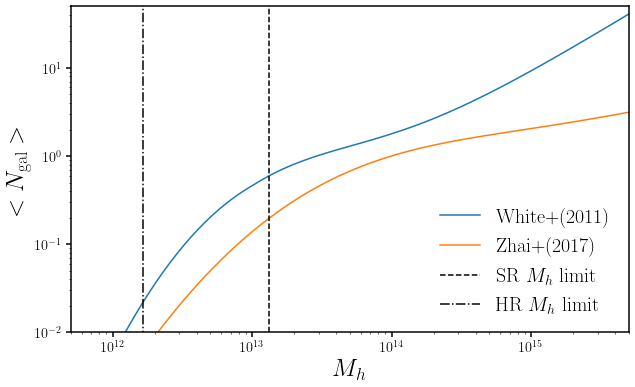

In [10]:
logMbin = np.linspace(11., 16., 100) # logMh bins

fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)

sub.plot(10**logMbin, Ngal_Mh(white2011, logMbin), label='White+(2011)')
sub.plot(10**logMbin, Ngal_Mh(zhai2017, logMbin), label='Zhai+(2017)')
#sub.plot(10**logMbin, Ngal_Mh(fiducial, logMbin), c='k', label='fiducial')


sub.plot([10**Mh_lim_sr, 10**Mh_lim_sr], [1e-3, 1e3], c='k', ls='--', label='SR $M_h$ limit')
sub.plot([10**Mh_lim_hr, 10**Mh_lim_hr], [1e-3, 1e3], c='k', ls='-.', label='HR $M_h$ limit')

sub.legend(loc='lower right', fontsize=20)
sub.set_xlabel('$M_h$', fontsize=25)
sub.set_xscale('log')
sub.set_xlim(5e11, 5e15)
sub.set_ylabel(r'$<N_{\rm gal}>$', fontsize=25)
sub.set_yscale('log')
sub.set_ylim(1e-2, 5e1)

# LOWZ sample

In [14]:
# HOD parameters: logMmin, sigma_logM, logM0, alpha, logM1
manera2015_ngc = np.array([13.2, 0.62, 13.24, 0.93, 14.32])
manera2015_sgc = np.array([13.14, 0.55, 13.43, 0.93, 14.58])

/opt/anaconda3/envs/emanu/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/emanu/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


(0.01, 50.0)

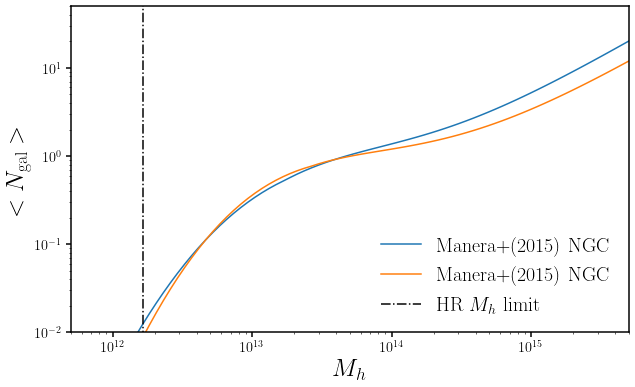

In [16]:
logMbin = np.linspace(11., 16., 100) # logMh bins

fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)

sub.plot(10**logMbin, Ngal_Mh(manera2015_ngc, logMbin), label='Manera+(2015) NGC')
sub.plot(10**logMbin, Ngal_Mh(manera2015_sgc, logMbin), label='Manera+(2015) NGC')

#sub.plot([10**Mh_lim_sr, 10**Mh_lim_sr], [1e-3, 1e3], c='k', ls='--', label='SR $M_h$ limit')
sub.plot([10**Mh_lim_hr, 10**Mh_lim_hr], [1e-3, 1e3], c='k', ls='-.', label='HR $M_h$ limit')

sub.legend(loc='lower right', fontsize=20)
sub.set_xlabel('$M_h$', fontsize=25)
sub.set_xscale('log')
sub.set_xlim(5e11, 5e15)
sub.set_ylabel(r'$<N_{\rm gal}>$', fontsize=25)
sub.set_yscale('log')
sub.set_ylim(1e-2, 5e1)